In [1]:
### import public python packages
import sys
import os
import numpy as np
import pandas as pd
import itertools
# import tabulate as tab

# time
import datetime as dt
from time import time

# machine learning
import sklearn
import pickle
import joblib
#import interactions
#import scikitplot
import xgboost
import imblearn

# math / stats
import scipy.special
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api

# plotting
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import seaborn as sns
from pandas.plotting import scatter_matrix
import bokeh

"""
requirements generated from copy of this ipynb using pipreqs:

python==3.10
basemap==1.3.6
basemap_data==1.3.2
bokeh==3.1.0
imbalanced_learn==0.10.1
ipython==8.12.0
joblib==1.1.1
matplotlib==3.5.3
numpy==1.23.5
pandas==1.5.3
scikit_learn==1.2.2
scipy==1.10.1
seaborn==0.12.2
statsmodels==0.13.5
xgboost==1.7.3
"""

'\nrequirements generated from copy of this ipynb using pipreqs:\n\npython==3.10\nbasemap==1.3.6\nbasemap_data==1.3.2\nbokeh==3.1.0\nimbalanced_learn==0.10.1\nipython==8.12.0\njoblib==1.1.1\nmatplotlib==3.5.3\nnumpy==1.23.5\npandas==1.5.3\nscikit_learn==1.2.2\nscipy==1.10.1\nseaborn==0.12.2\nstatsmodels==0.13.5\nxgboost==1.7.3\n'

In [2]:
'''
RdBu=plt.cm.RdBu							#diverging red to blue
twilight_shifted=plt.cm.twilight_shifted	#diverging blue to red (black)
viridis=plt.cm.viridis						#blue to light yellow
inferno=plt.cm.inferno						#black to white!
gray=plt.cm.gray							#black to white!
colors=["black" 000000 0,0,0,
        "darkred" 8b0000 139,0,0,
        "tab:blue" 1f77b4 31,119,180,
        "tab:orange" ff7f0e 255,127,14,
        "lightgray" d3d3d3 211,211,211]
brightness=[0,27,44,65,83]
'''

# set a plotting style for matplotlib
def get_cmap_colors(cmap_min,cmap_max,steps,cmap):
	cmap=matplotlib.cm.get_cmap(cmap)
	return cmap(np.linspace(cmap_min,cmap_max,steps))
colors=["black", "darkred", "tab:blue", "tab:orange","lightgray"]
gray=plt.cm.gray
matplotlib.rcParams['agg.path.chunksize'] = 10000
matplotlib.rcParams.update({'font.size': 13})
#to be matched with markdown font:
matplotlib.rcParams['mathtext.fontset'] ='stix'
matplotlib.rcParams['font.family'] ='STIXGeneral'

marker = itertools.cycle(['o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's',
                          'd', 'd', 'd', 'd', 'd', '>', '>', '>', '>', '>',
                          '*', '*', '*', '*', '*', 'X', 'X', 'X', 'X', 'X']) 
cc = (matplotlib.cycler(marker=['None','o', 's','d','>','*','X'])
      * matplotlib.cycler(linestyle=['-', '--', '-.', ':'])
      * matplotlib.cycler(color=[colors[2],
                                 colors[3],colors[1],colors[4],colors[0]]))
matplotlib.rcParams['axes.prop_cycle'] = cc
cmap=plt.cm.viridis
x=np.linspace(0,100,10)
y=np.linspace(0,100,10)
"""
for i in range(50):
    plt.scatter(x,i*y,marker=next(marker))
plt.show()
for i in range(50): plt.plot(x,i*y)
"""

pd.set_option('display.max_columns', None)




In [13]:
# convert object variables to get a more meaningfull output of describe:
def data_preprocessing_for_visualization(df):
    """
    description:
    -Convert variables in df to more useful variables for the modeling later on
    -Add new varibles by feature engineering
    -Changes are made directly on the df given to the function
    -Further preprocessing including NaN treatment and scaling are done in
     another function
    returns: preprocessed df (for plotting and data audit)
    """
    # change type of Date to datetime format
    df.Date = pd.to_datetime(df.Date, format = "%Y-%m-%d", exact = True)
    # create new date variables
    df["Day"] = df.Date.dt.day # not a relevant variable for plotting
    df["Month"] = df.Date.dt.month
    df["Year"] = df.Date.dt.year
    
    # add coordinates to locations including altitude and number/identifier of
    # nearest bureau station
    df_temp=pd.DataFrame({"Location":df.Location.unique(),
 "NearestBureauStationNr":["072160", "067108", "048027", "059151", "053115",
"061055", "061366", "200288", "067113", "067105", "066214", "066037", "072150",
"061078", "068228", "070351", "070339", "070349", "089002", "081123", "085072",
"086282", "086338", "076031", "078015", "090171", "086068", "090194", "040913",
"031011", "040764", "032040", "023034", "026021", "023373", "016001", "009500",
"109521", "009053", "009021", "009225", "012071", "009998", "094029", "091237",
"015590", "014015", "014932", "015635"],
 "Location_Latitude":[36.07, 33.90, 31.48, 30.32, 29.49, 32.92, 33.28, 29.04,
33.72, 33.60, 33.86, 33.95, 35.16, 32.79, 34.37, 35.31, 35.42, 35.53, 37.51,
36.74, 38.12, 37.67, 37.83, 34.24, 36.31, 38.31, 37.74, 37.92, 27.48, 16.87,
27.94, 19.25, 34.95, 37.75, 34.48, 31.16, 35.03, 34.03, 31.67, 31.93, 31.92,
32.99, 34.95, 42.89, 41.42, 23.80, 12.42, 14.52, 25.19],
 "Location_Longitude":[146.95, 150.73, 145.83, 153.12, 149.85, 151.80, 151.58,
167.94, 150.68, 150.78, 151.20, 151.17, 147.46, 151.84, 150.93, 149.20, 149.09,
148.77, 143.79, 144.33, 147.13, 144.83, 144.98, 142.09, 141.65, 141.47, 145.10,
141.26, 153.04, 145.75, 153.43, 146.77, 138.52, 140.77, 139.01, 136.81, 117.88,
115.06, 116.02, 115.98, 115.87, 121.62, 116.72, 147.33, 147.12, 133.89, 130.89,
132.38, 130.97],
 "Location_Elevation":[164, 81, 260, 4, 213, 33, 19, 112, 25, 19, 43, 6, 212,
8, 10, 577, 587, 1760, 435, 209, 5, 113, 8, 50, 139, 81, 66, 51, 8, 2, 3, 4, 2,
63, 275, 167, 3, 85, 40, 15, 25, 249, 73, 51, 5, 546, 30, 134, 492]})
    df = pd.merge(df, df_temp, on='Location', how='left')
    # towns with many occurences in Australia such that the station might
    # be wrong:
    # Richmond, (Mount Ginini, Portland, PearceRAAF, Perth
    # richmond RAAF 067105  33.60 150.78 19
    # richmond post office 030045 20.73 143.14  211
    #display(Markdown(df_temp.to_markdown(index=False)))
    
    # replace wind direction labels by angles (in radians from 0 to 2*pi):
    for i in df[["WindGustDir","WindDir9am","WindDir3pm"]]:
        df[i]=df[i].replace(["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                             "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"],
                            [j*np.pi/8 for j in range(16)])
    # create two new variables representing the wind direction as cosinus and
    # sinus part
    for i in df[["WindGustDir","WindDir9am","WindDir3pm"]]:
        df[str(i)+"_cos"] = np.round(np.cos(df[i]),2)
        df[str(i)+"_sin"] = np.round(np.sin(df[i]),2)
    
    # replace RainX by numerical value:
    # float type, cause there are NaN in vars: cannot create int type
    df.RainToday=df.RainToday.replace(["Yes","No"],[1,0])
    df.RainTomorrow=df.RainTomorrow.replace(["Yes","No"],[1,0])
    return df

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('C:/Users/49152/Documents/1_Beruf/1_Kasia/DataScience/weatherAUS.csv')

# Sort data by date and reset index
df = df.sort_values(by='Date').reset_index(drop=True)

# Print first five rows
print(df.head())

In [ ]:

    # sort values by date, before train test split
    #display(df.head(20))
    df=df.sort_values(by='Date').reset_index(drop=True) # ToDo: resetindex or
     # not?
    #display(df.head(20))
    
    # remove object type vars and old vars
    df=df.drop(["Date","Location","NearestBureauStationNr", "WindGustDir",
                "WindDir9am","WindDir3pm"],axis=1)
    display("data shape after resorting df by Date (ascending) and removing\
 object type and outdated (replaced) variables:",df.shape)
    
    # remove all entires with NaN in target variable and related variables (
    # RainToday and Rainfall)
    df=df.dropna(axis = 0, how = 'any', subset = ['RainToday', 'RainTomorrow',
                                                  'Rainfall'])
    display("data shape after removing rows with NaN in target variables:",
            df.shape)
    
    # change the order of the variables/columns for better structure of df
    df=df.loc[:,["Day","Month","Year",
"Location_Latitude", "Location_Longitude", "Location_Elevation", "MinTemp",
"MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed",
"WindGustDir_cos", "WindGustDir_sin", "WindDir9am_cos",
"WindDir9am_sin", "WindDir3pm_cos", "WindDir3pm_sin",
"WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am",
"Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "Rainfall",
"RainToday", "RainTomorrow"]]
    display("data shape after reordering the columns",df.shape)
    
    if nearby_locations != 0.:
        try:
            print("ToDo: implement feature generation from nearby stations!")
        except:
            print("Error: value of 'nearby_locations' must be a float.")
            return -1
    
    if nan_treatment_features == "drop":
        df=df.dropna(axis = 0, how = 'any')
    
    # ToDo change data/target variables, in case the modeling goal changes
    data = df.drop('RainTomorrow', axis=1)
    target = df.RainTomorrow
    #display(df.head(),df.tail())
    X_train, X_test, y_train, y_test = sklearn.model_selection.\
    train_test_split(data, target, test_size = 0.2,
                     random_state = 120, shuffle = False)
        # Todo use or not: shuffle=True
    #display(X_train.iloc[0],X_train.iloc[-1])
    #display(X_test.iloc[0],X_test.iloc[-1])
    if nan_treatment_features == "mean_mode_all":
        # replace NaN in discrete variables with the mode:
        for i in ["Cloud9am",
                  "Cloud3pm", "WindGustDir_cos", "WindGustDir_sin",
                  "WindDir9am_cos", "WindDir9am_sin", "WindDir3pm_cos",
                  "WindDir3pm_sin"]:
            X_train_mode_i = X_train[i].mode()[0]
            X_train[i]=X_train[i].fillna(X_train_mode_i)
            X_test[i]=X_test[i].fillna(X_train_mode_i)
        del X_train_mode_i
        
        # replace NaN in continuous variables with the mean
        for i in ["MinTemp", "MaxTemp", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
    "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]:
            X_train_mean_i = X_train[i].mean()
            X_train[i]=X_train[i].fillna(X_train_mean_i)
            X_test[i]=X_test[i].fillna(X_train_mean_i)
        del X_train_mean_i
    elif nan_treatment_features == "mean_mode_local":
        print("ToDo: implement local NaN treatment!")
    elif nan_treatment_features == "drop":
        pass
    else:
        print("wrong value in 'nan_treatment_features' parameter given.\n\
Possible values are:\n mean_mode_all, mean_mode_local, drop")
        return -1
    
    if scaling == "std":
        scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    elif scaling == "minmax":
        scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    elif scaling == "None":
        pass
    else:
        print("wrong value in 'scaling' parameter given. Possible values are:\
\n std, minmax, None")
        return -1
    
    if sampling == "over":
        X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
        print("ToDo: does this work as intended, or is the sampling mixing up\
 the dates?")
    elif sampling == "under":
        X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)
        print("ToDo: does this work as intended, or is the sampling mixing up\
 the dates?")
    elif sampling == "None":
        pass
    else:
        print("wrong value in 'sampling' parameter given. Possible values are:\
\n over, under, None")
        return -1
    
    columns = df.columns
    df = pd.DataFrame(np.column_stack((np.vstack((X_train,X_test)),
                                       np.concatenate((y_train,y_test)))),
                      columns=columns)
    del columns
    display("final data shape (after treating NaNs in features):",
        df.shape)
    return df, X_train, X_test, y_train, y_test



In [15]:
def preprocess_data(df, nearby_locations=0., nan_treatment_features='drop',
                    scaling='std', sampling='None'):
    import sklearn.preprocessing
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
    
    # sort values by date, before train test split
    df = df.sort_values(by='Date').reset_index(drop=True)
    
    # remove object type vars and old vars
    df = df.drop(["Date", "Location", "NearestBureauStationNr", "WindGustDir",
                  "WindDir9am", "WindDir3pm"], axis=1)
    print("data shape after resorting df by Date (ascending) and removing\
 object type and outdated (replaced) variables:", df.shape)
    
    # remove all entries with NaN in target variable and related variables (
    # RainToday and Rainfall)
    df = df.dropna(axis=0, how='any', subset=['RainToday', 'RainTomorrow',
                                               'Rainfall'])
    print("data shape after removing rows with NaN in target variables:", df.shape)
    
    # change the order of the variables/columns for better structure of df
    df = df.loc[:, ["Day", "Month", "Year",
                    "Location_Latitude", "Location_Longitude",
                    "Location_Elevation", "MinTemp", "MaxTemp", "Evaporation",
                    "Sunshine", "WindGustSpeed", "WindGustDir_cos",
                    "WindGustDir_sin", "WindDir9am_cos", "WindDir9am_sin",
                    "WindDir3pm_cos", "WindDir3pm_sin", "WindSpeed9am",
                    "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am",
                    "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm",
                    "Rainfall", "RainToday", "RainTomorrow"]]
    print("data shape after reordering the columns", df.shape)
    
    if nearby_locations != 0.:
        try:
            raise ValueError("ToDo: implement feature generation from nearby stations!")
        except ValueError as e:
            print(e)
    
    if nan_treatment_features == "drop":
        df = df.dropna(axis=0, how='any')
    elif nan_treatment_features == "mean_mode_all":
        


SyntaxError: incomplete input (857731589.py, line 43)

In [5]:
def data_audit(df,
               target = "",
               descriptions = "",
               known = "",
               cat_quanti = "",
               comments = ""):
    """
    generate a markdown formatted table of varibale properties for a pandas
    dataframe
    
    arguments:
    mandatory:
    df = dataframe to audit
    optional:
    target = list of booleans stating if the respective variable of the df
        is a "feature": False or "target": True variable (for supervised ML)
    descriptions = list of strings describing each variable of the df
    known = list of booleans:
        True / False: variable is known / not-known before modeling/predicting
    cat_quanti = list of strings stating if the variable is categorical or
        numerical (discrete, continuous, time/date, text, image...)
    comments = list of strings with comments on each variable
    """
    nrs = list(range(df.shape[1]))
    names = df.columns
    if target == "":
        target = [False for i in np.zeros(df.shape[1])]
    if descriptions == "":
        descriptions= ["" for i in np.zeros(df.shape[1])]
    if known == "":
        known = ["" for i in np.zeros(df.shape[1])]
    if cat_quanti == "":
        cat_quanti = ["" for i in np.zeros(df.shape[1])]
    if comments == "":
        comments = ["" for i in np.zeros(df.shape[1])]
    dtypes = df.dtypes.values.astype(str)
    NaNs = df.isna().sum().values
    NaN_fraction = np.round(df.isna().sum().values/len(df)*100,1)
    
    
    
    # describe all variables (distribution, statistics)
    temp=df.describe(include="all", datetime_is_numeric=True)
    distribution = []
    for i in df.columns:
        if ("date" in str(df[i].dtype)) or ("time" in str(df[i].dtype)):
            distribution.append("- count = "+str(temp[i]["count"])\
                  +"<br>- min = "+str(temp[i]["min"])[:-9]\
                  +"<br>- max = "+str(temp[i]["max"])[:-9])# only include date
        elif i in df.select_dtypes(include = "O").columns:
            distribution.append("- count = "+str(temp[i]["count"])\
                  +"<br>- unique = "+str(temp[i]["unique"])\
                  +"<br>- top = "+str(temp[i]["top"])\
                  +"<br>- freq = "+str(temp[i]["freq"]))
        else:
            distribution.append("- count = "+str(int(temp[i]["count"]))\
                  +"<br>- min = "+str(np.round(temp[i]["min"],2))\
                  +"<br>- max = "+str(np.round(temp[i]["max"],2))\
                  +"<br>- 50% = "+str(np.round(temp[i]["50%"],2))\
                  +"<br>- mean = "+str(np.round(temp[i]["mean"],2))\
                  +"<br>- std = "+str(np.round(temp[i]["std"],2)))
    df_temp=pd.DataFrame({"number":nrs,"variable name":names,
                           "target":target,"description":descriptions,
                           "known a priori":known,"data type":dtypes,
                           "# NaNs":NaNs,"% NaN":NaN_fraction,
                           "variable type":cat_quanti,
                           "distribution":distribution,"Comments":comments},
                         index=names)
    df_temp=df_temp.loc[
    ["Date","Day","Month","Year","Location","NearestBureauStationNr",
    "Location_Latitude","Location_Longitude","Location_Elevation",
    "WindGustDir","WindGustDir_cos","WindGustDir_sin","WindDir9am",
    "WindDir9am_cos","WindDir9am_sin","WindDir3pm","WindDir3pm_cos",
    "WindDir3pm_sin","WindGustSpeed","WindSpeed9am", "WindSpeed3pm","MinTemp",
    "MaxTemp","Temp9am","Temp3pm","Evaporation","Humidity9am","Humidity3pm",
    "Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Sunshine",
    "Rainfall", "RainToday", "RainTomorrow"],:]
    table=df_temp.to_markdown(index=False)
    header = "# data audit\n"
    footer = "\n- number of rows and columns in dataframe : " + str(df.shape)
    return header + table + footer

In [ ]:
import pandas as pd 
df=pd.read_csv("C:/Users/49152/Documents/1_Beruf/1_Kasia/DataScience/weatherAUS.csv")
# check if there are duplicated entries in the df
print("\namount of duplicated entries:",df.duplicated().sum(),"\n")
# no duplicated entries found!
print("Amount of different locations:",len(df.Location.unique())) #49
#df.WindGustDir[df.WindGustDir.isna()==False]
print("Different WindGustDir values:",df.WindGustDir.unique())
print("Different RainToday/Tomorrow values:",df.RainToday.unique(),
      df.RainTomorrow.unique())
print(df.info())
print(df.describe())


#sns.lineplot(df.Date)
# check 
df.Location.value_counts()



df=data_preprocessing_for_visualization(df)
df.head()

In [ ]:
print(df.groupby(df["Date"].dt.month).describe())

In [16]:
# automated generation of a markdown table with variable properties
target = [False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          True,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False]
descriptions = ["[year-month-day]<br>date of weather observation",
"[str]<br>inofficial name/town of weather station",
"[ $^{\circ}$ C]<br>min T in (24h to 9am). Sometimes nearest whole degree",
"[ $^{\circ}$ C]<br>max T (24h to 9am). Sometimes nearest whole degree",
"[mm]<br>Precipitation (rainfall) (24 hours to 9am).\
 Sometimes nearest whole millimetre",
"[mm]<br>'Class A' pan evaporation (24h to 9am)",
"[h]<br>Bright sunshine (24h to 0am)",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>Direction of strongest gust\
 (24h to 0am)",
"[km/h]<br>Speed of strongest wind gust (24h to 0am)",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>averaged over 10min prior to\
 9am",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>averaged over 10min prior to\
 3pm",
"[km/h]<br>averaged over 10min prior to 9am",
"[km/h]<br>averaged over 10min prior to 3pm",
"[%]<br>Relative humidity at 9am",
"[%]<br>Relative humidity at 3pm",
"[hPa]<br>Atmospheric pressure reduced to mean sea level at 9am",
"[hPa]<br>Atmospheric pressure reduced to mean sea level at 3pm",
"[octas]<br>Fraction of sky obscured by cloud at 9 am ",
"[octas]<br>Fraction of sky obscured by cloud at 3pm",
"[ $^{\circ}$ C]<br>T at 9am",
"[ $^{\circ}$ C]<br>T at 3pm",
"1 if precipitation (mm) (24h to 9am) exceeds 1mm, otherwise 0",
"1 if precipitation (mm) (24h to 9am) exceeds 1mm, otherwise 0",
"[day]<br>day of weather observation",
"[month]<br>month of weather observation",
"[year]<br>year of weather observation",
"Identifier string number of weather station closest to given location",
"[ $^{\circ}$ ] approx. latitude coordinate of given location",
"[ $^{\circ}$ ] approx. longitude coordinate of given location",
"[masl] approx. elevation coordinate of given location",
"[cosine of direction] for WindGustDir",
"[sine of direction] for WindGustDir",
"[cosine of direction] for WindDir9am",
"[sine of direction] for WindDir9am",
"[cosine of direction] for WindDir3pm",
"[sine of direction] for WindDir3pm"]
known = [True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        False,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True]
cat_quanti = ["cat ord<br>date",
              "cat num<br>should be<br>ord",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "cat ord",
              "num con",
              "cat ord",
              "cat ord",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "num dis",
              "num dis",
              "num con",
              "num con",
              "cat bin",
              "cat bin",
              "num dis",
              "num dis",
              "num dis",
              "cat num",
              "num con",
              "num con",
              "num con",
              "num dis",
              "num dis",
              "num dis",
              "num dis",
              "num dis",
              "num dis"]
comments = ["convert",
            "convert",
            "",
            "",
            "",
            "",
            "",
            "convert",
            "",
            "convert",
            "convert",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "convert",
            "convert",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added"]
table=data_audit(df,target = target, descriptions = descriptions,
                 known = known,cat_quanti = cat_quanti, comments = comments)
display(Markdown(table))
print(table)
# put the dataframe variables in a more useful order


NameError: name 'data_audit' is not defined

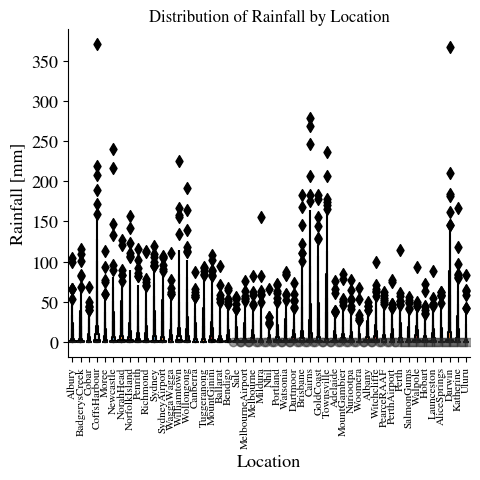

In [10]:
bp = sns.catplot(y="Rainfall", x="Location", kind = 'boxen',data = df)
plt.title("Distribution of Rainfall by Location", fontsize=12)
plt.xlabel("Location")
plt.ylabel("Rainfall [mm]")
#plt.semilogy()
plt.xticks(rotation=90,fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\49152\AppData\Local\Temp\ipykernel_6300\465086025.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby("Location").mean()["RainToday"].index,
C:\Users\49152\AppData\Local\Temp\ipykernel_6300\465086025.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Location").mean()["RainToday"],
C:\Users\49152\AppData\Local\Temp\ipykernel_6300\465086025.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for t

Location
Adelaide            0.222905
Albany              0.299072
Albury              0.204915
AliceSprings        0.080475
BadgerysCreek       0.199112
Ballarat            0.257926
Bendigo             0.185234
Brisbane            0.224296
Cairns              0.317938
Canberra            0.184026
Cobar               0.129183
CoffsHarbour        0.294277
Dartmoor            0.313052
Darwin              0.266834
GoldCoast           0.260067
Hobart              0.239021
Katherine           0.169872
Launceston          0.231176
Melbourne           0.261191
MelbourneAirport    0.217016
Mildura             0.108746
Moree               0.138052
MountGambier        0.303860
MountGinini         0.281734
Newcastle           0.247377
Nhil                0.154238
NorahHead           0.275862
NorfolkIsland       0.310054
Nuriootpa           0.197136
PearceRAAF          0.182839
Penrith             0.200742
Perth               0.202004
PerthAirport        0.188435
Portland            0.365154
Richm

FileNotFoundError: [Errno 2] No such file or directory: '../data/plots/fraction_rainydays_per_location.png'

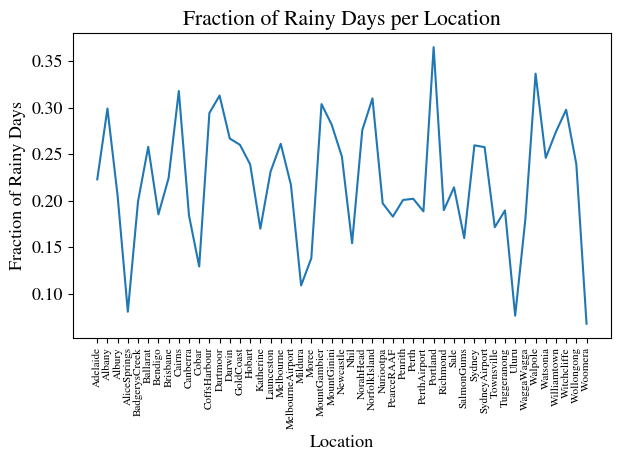

In [11]:
plt.title('Fraction of Rainy Days per Location')
plt.plot(df.groupby("Location").mean()["RainToday"].index,
         df.groupby("Location").mean()["RainToday"],
         color=colors[2]);
print(df.groupby("Location").mean()["RainToday"])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Location")
plt.ylabel("Fraction of Rainy Days")
#plt.show()
plt.tight_layout()
#plt.show()
plt.savefig("../data/plots/fraction_rainydays_per_location.png",dpi=300)


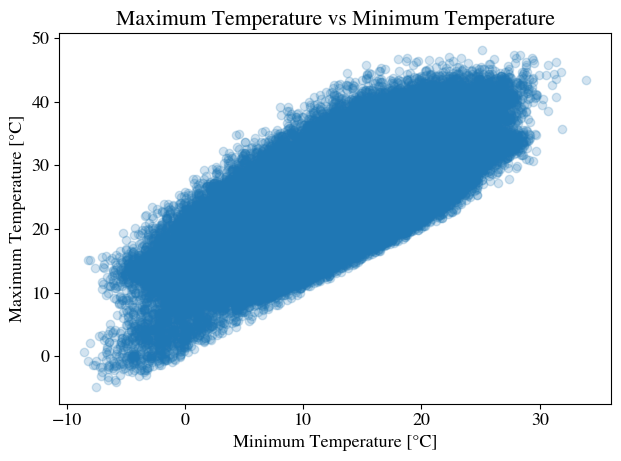

In [7]:
plt.scatter(df["MinTemp"], df["MaxTemp"], alpha=0.2)
plt.title("Maximum Temperature vs Minimum Temperature")
plt.xlabel("Minimum Temperature [°C]")
plt.ylabel("Maximum Temperature [°C]")
#plt.show()
plt.tight_layout()


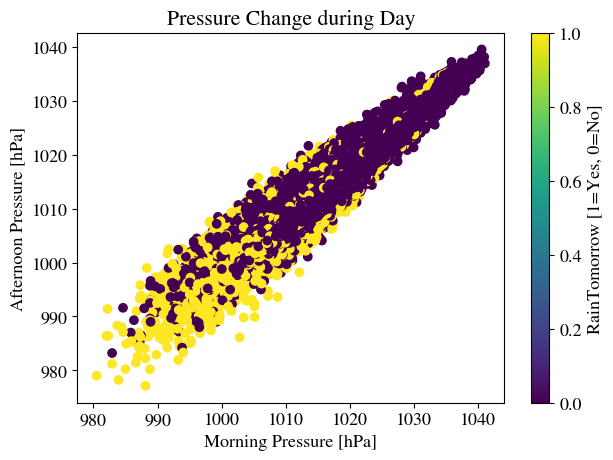

In [12]:
plt.scatter(df["Pressure9am"], df["Pressure3pm"],c=df["RainTomorrow"], alpha=1)
plt.title("Pressure Change during Day")
plt.xlabel("Morning Pressure [hPa]")
plt.ylabel("Afternoon Pressure [hPa]")
plt.colorbar(label="RainTomorrow [1=Yes, 0=No]")
#plt.legend()
#plt.show()
plt.tight_layout()


C:\Users\49152\AppData\Local\Temp\ipykernel_12112\1757373179.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_month = df.groupby(df["Date"].dt.month).mean()
C:\Users\49152\AppData\Local\Temp\ipykernel_12112\1757373179.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year = df.groupby(df["Date"].dt.year).mean()


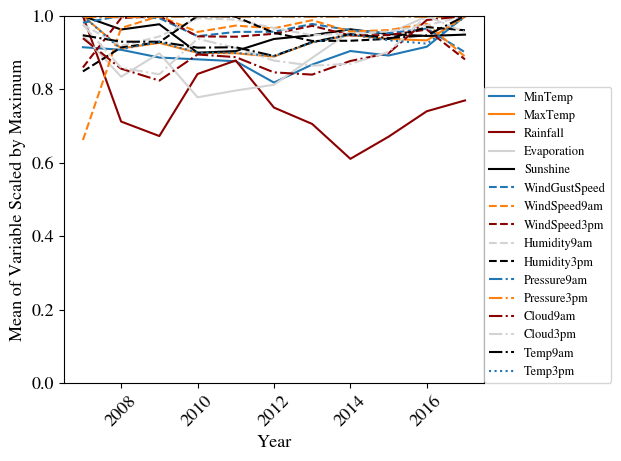

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
mean_per_month = df.groupby(df["Date"].dt.month).mean()
temp = 0
for i in mean_per_month.columns:
    if ((i!="Month")
    and (i!="Year")
    and (i!="Location_Latitude")
    and (i!="Location_Longitude")
    and (i!="Location_Elevation")
    and (i!="WindGustDir_cos")
    and (i!="WindGustDir_sin")
    and (i!="WindDir9am_cos")
    and (i!="WindDir9am_sin")
    and (i!="WindDir3pm_cos")
    and (i!="WindDir3pm_sin")):
        plt.plot(mean_per_month.index,
                 mean_per_month[i]/np.max(mean_per_month[i]),
                 label=i)
plt.ylim(0,1)
plt.ylabel("mean of variable scaled by maximum")
plt.xlabel("month")
plt.xlim(1,12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'March', "April", "May","June","July",
                         "Aug", 'Sept',"Oct","Nov", 'Dec'],rotation=45)
plt.legend(fontsize=9,loc=(1,0))
#plt.show()
plt.tight_layout()

plt.clf()
mean_per_year = df.groupby(df["Date"].dt.year).mean()
for i in mean_per_year.columns:
    if ((i!="Month")
    and (i!="Year")
    and (i!="Location_Latitude")
    and (i!="Location_Longitude")
    and (i!="Location_Elevation")
    and (i!="WindGustDir_cos")
    and (i!="WindGustDir_sin")
    and (i!="WindDir9am_cos")
    and (i!="WindDir9am_sin")
    and (i!="WindDir3pm_cos")
    and (i!="WindDir3pm_sin")):
        plt.plot(
            mean_per_year.index,mean_per_year[i]/np.max(mean_per_year[i]),
            label=i)
plt.ylim(0,1)
plt.ylabel("Mean of Variable Scaled by Maximum")
plt.xlabel("Year")
#plt.xlim(1,12)
plt.xticks(rotation=45)
plt.legend(fontsize=9,loc=(1,0))
#plt.show()
plt.tight_layout()


In [ ]:
 display("data shape after 1st preproc. function:",df.shape)
    
    # remove locations with few occurrences: Katherine, Nhil and Uluru:
    df=df[(df.Location!="Katherine") & (df.Location!="Nhil")
          & (df.Location!="Uluru")]
    display("data shape after removing Locations:",df.shape)
    
    # sort values by date, before train test split
    #display(df.head(20))
    df=df.sort_values(by='Date').reset_index(drop=True) # ToDo: resetindex or
     # not?
    #display(df.head(20))
    
    # remove object type vars and old vars
    df=df.drop(["Date","Location","NearestBureauStationNr", "WindGustDir",
                "WindDir9am","WindDir3pm"],axis=1)
    display("data shape after resorting df by Date (ascending) and removing\
 object type and outdated (replaced) variables:",df.shape)
    
    # remove all entires with NaN in target variable and related variables (
    # RainToday and Rainfall)
    df=df.dropna(axis = 0, how = 'any', subset = ['RainToday', 'RainTomorrow',
                                                  'Rainfall'])
    display("data shape after removing rows with NaN in target variables:",
            df.shape)
    
    # change the order of the variables/columns for better structure of df
    df=df.loc[:,["Day","Month","Year",
"Location_Latitude", "Location_Longitude", "Location_Elevation", "MinTemp",
"MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed",
"WindGustDir_cos", "WindGustDir_sin", "WindDir9am_cos",
"WindDir9am_sin", "WindDir3pm_cos", "WindDir3pm_sin",
"WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am",
"Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "Rainfall",
"RainToday", "RainTomorrow"]]
    display("data shape after reordering the columns",df.shape)
    
    if nearby_locations != 0.:
        try:
            print("ToDo: implement feature generation from nearby stations!")
        except:
            print("Error: value of 'nearby_locations' must be a float.")
            return -1
    
    if nan_treatment_features == "drop":
        df=df.dropna(axis = 0, how = 'any')
    
    # ToDo change data/target variables, in case the modeling goal changes
    data = df.drop('RainTomorrow', axis=1)
    target = df.RainTomorrow
    #display(df.head(),df.tail())
    X_train, X_test, y_train, y_test = sklearn.model_selection.\
    train_test_split(data, target, test_size = 0.2,
                     random_state = 120, shuffle = False)
        # Todo use or not: shuffle=True
    #display(X_train.iloc[0],X_train.iloc[-1])
    #display(X_test.iloc[0],X_test.iloc[-1])
    if nan_treatment_features == "mean_mode_all":
        # replace NaN in discrete variables with the mode:
        for i in ["Cloud9am",
                  "Cloud3pm", "WindGustDir_cos", "WindGustDir_sin",
                  "WindDir9am_cos", "WindDir9am_sin", "WindDir3pm_cos",
                  "WindDir3pm_sin"]:
            X_train_mode_i = X_train[i].mode()[0]
            X_train[i]=X_train[i].fillna(X_train_mode_i)
            X_test[i]=X_test[i].fillna(X_train_mode_i)
        del X_train_mode_i
        
        # replace NaN in continuous variables with the mean
        for i in ["MinTemp", "MaxTemp", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
    "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]:
            X_train_mean_i = X_train[i].mean()
            X_train[i]=X_train[i].fillna(X_train_mean_i)
            X_test[i]=X_test[i].fillna(X_train_mean_i)
        del X_train_mean_i
    elif nan_treatment_features == "mean_mode_local":
        print("ToDo: implement local NaN treatment!")
    elif nan_treatment_features == "drop":
        pass
    else:
        print("wrong value in 'nan_treatment_features' parameter given.\n\
Possible values are:\n mean_mode_all, mean_mode_local, drop")
        return -1
    
    if scaling == "std":
        scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    elif scaling == "minmax":
        scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    elif scaling == "None":
        pass
    else:
        print("wrong value in 'scaling' parameter given. Possible values are:\
\n std, minmax, None")
        return -1
    
    if sampling == "over":
        X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
        print("ToDo: does this work as intended, or is the sampling mixing up\
 the dates?")
    elif sampling == "under":
        X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)
        print("ToDo: does this work as intended, or is the sampling mixing up\
 the dates?")
    elif sampling == "None":
        pass
    else:
        print("wrong value in 'sampling' parameter given. Possible values are:\
\n over, under, None")
        return -1
    
    columns = df.columns
    df = pd.DataFrame(np.column_stack((np.vstack((X_train,X_test)),
                                       np.concatenate((y_train,y_test)))),
                      columns=columns)
    del columns
    display("final data shape (after treating NaNs in features):",
        df.shape)
    return df, X_train, X_test, y_train, y_test


# In[8]:


if __name__ == "__main__":
    # usually df's with many cols/vars/features are not displayed completely,
    # omit this by: showing all columns of a df:
    pd.set_option('display.max_columns', None)
    
    print("Example for using the preprocessing function defined above:")
    df=pd.read_csv("../data/weatherAUS.csv")
    df, X_train, X_test, y_train, y_test = \
    data_preprocessing(df)
    display(df)
    print("do the modeling on the obtained train and test sets.")
    df=pd.read_csv("../data/weatherAUS.csv")
    df, X_train, X_test, y_train, y_test = \
    data_preprocessing(df, nan_treatment_features = "drop")
    display(df)

In [14]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def get_nearby_stations(station_id, n, station_df):
    current_station = station_df.loc[station_df['ID'] == station_id].iloc[0]
    station_df['Distance'] = station_df.apply(lambda row: haversine(current_station['Latitude'], current_station['Longitude'], row['Latitude'], row['Longitude']), axis=1)
    nearby_stations = station_df.sort_values('Distance').head(n)
    return nearby_stations['ID'].tolist()

def generate_features(station_data, station_df, nearby_stations_count):
    features = []

    # Add existing features
    for column in ['PM2.5', 'PM10', 'O3', 'NO2', 'CO', 'SO2']:
        features.append(station_data[column])

    # Generate new features
    nearby_stations = get_nearby_stations(station_data['station_id'], nearby_stations_count, station_df)
    for column in ['PM2.5', 'PM10', 'O3', 'NO2', 'CO', 'SO2']:
        nearby_values = [station_df.loc[(station_df['ID'] == sid), column].values[0] for sid in nearby_stations]
        mean_value = sum(nearby_values) / len(nearby_values)
        features.append(mean_value)

    return features


In [14]:
def preprocess_data(df):
    # Fill NaN values for PM2.5 and PM10 using mean of surrounding values
    df[['PM2.5', 'PM10']] = df[['PM2.5', 'PM10']].interpolate(method='linear')
    df[['PM2.5', 'PM10']] = df[['PM2.5', 'PM10']].fillna(df[['PM2.5', 'PM10']].mean())
    
    # Fill NaN values for other features using

In [2]:
#  linear regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['Temp9am']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train, X_test, y_train, and y_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)


Mean squared error: 3.541176491981925
R-squared score: 0.9186346075338597


For a binary classification such as "rain" or "no rain", linear regression is not ideally suited because it predicts continuous values and does not calculate probabilities for a particular class. In this case, a classification algorithm such as logistic regression should be used instead.

The Confusion Matrix is a tool for evaluating the performance of a classification algorithm, and it is indeed available for linear regressions as well. However, it is not computed directly from linear regression. To create the Confusion Matrix, one must convert the predictions of the linear regression into discrete classes, for example by using a threshold. Then the Confusion Matrix and other performance measures can be calculated.

In [19]:
# Random Forest Regressor
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['Temp9am']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Fill missing values in y with the mean value
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['real'], colnames=['pred']).to_markdown())

Mean Squared Error: 3.8165107076327427
R-squared: 0.9118498156045562


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Random Forest with Keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['Temp9am']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Fill missing values in y with the mean value
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print(pd.crosstab(y_test, y_pred, rownames=['real'], colnames=['pred']).to_markdown())

This code defines a simple neural network with one hidden layer and 10 neurons, and trains it using the mean squared error loss function and the Adam optimizer. The model is then used to make predictions on the testing set, and its performance is evaluated using the mean squared error and R-squared metrics.


In [18]:
pip install tensorflow


     -------------------------------------- 272.8/272.8 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 440.7/440.7 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.4 MB/s eta 0:00:00
     -------------------------------

In [3]:
#Random Forest Classifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# rest of your code here

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion matrix: [[30886     0]
 [    0  8822]]


In [29]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gaussian Naive Bayes classifier model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).to_markdown())
print(pd.crosstab(y_test, y_pred, rownames=['real'], colnames=['pred']).to_markdown())

Accuracy: 0.9737332527450387
Confusion matrix: [[29843  1043]
 [    0  8822]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     30886
           1       0.89      1.00      0.94      8822

    accuracy                           0.97     39708
   macro avg       0.95      0.98      0.96     39708
weighted avg       0.98      0.97      0.97     39708

|           |            0 |           1 |   accuracy |    macro avg |   weighted avg |
|:----------|-------------:|------------:|-----------:|-------------:|---------------:|
| precision |     1        |    0.894273 |   0.973733 |     0.947136 |       0.97651  |
| recall    |     0.966231 |    1        |   0.973733 |     0.983115 |       0.973733 |
| f1-score  |     0.982825 |    0.944186 |   0.973733 |     0.963506 |       0.974241 |
| support   | 30886        | 8822        |   0.973733 | 39708        |   39708        |
|   real |     0 |    1 |
|-------:|------:|-----:|
|      0 | 2984

Accuracy: 1.0
Confusion matrix: [[30886     0]
 [    0  8822]]


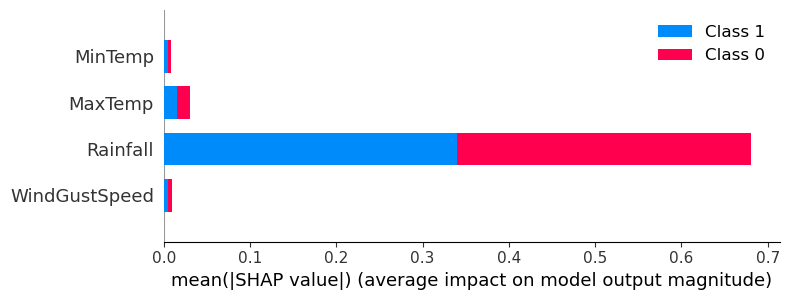

In [15]:
#SHAP with a RandomForestClassifier model
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

# Explain the model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Get the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
    
# Sort the features by their mean absolute SHAP value in descending order
sort_inds = np.argsort(mean_shap_values)[::-1]
    
# Generate SHAP values for the testing data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), sort=False)




In [16]:
#Bagging with a RandomForestClassifier model
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a bagging classifier model with random forest as the base estimator
model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy: 1.0
Confusion matrix: [[30886     0]
 [    0  8822]]


In [22]:
# Naive Bayes
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gaussian Naive Bayes classifier model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 0.9737332527450387
Confusion matrix: [[29843  1043]
 [    0  8822]]


To use Naive Bayes for this task, I replace the random forest classifier with a Naive Bayes classifier.

In [6]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gaussian Naive Bayes classifier model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 0.9737332527450387
Confusion matrix: [[29843  1043]
 [    0  8822]]


In [20]:
# Keras Modell 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


1241/1241 [==============================] - 1s 1ms/step
Accuracy: 0.999974816157953
Confusion matrix: [[30886     0]
 [    1  8821]]


In [7]:
# Naive with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the parameters to search over
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Train a Gaussian Naive Bayes classifier model with GridSearchCV for parameter optimization
model = GridSearchCV(GaussianNB(), param_grid, cv=10)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Best parameters:', model.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Best parameters: {'var_smoothing': 0.0003511191734215131}
Accuracy: 0.9987156240556059
Confusion matrix: [[30861    25]
 [   26  8796]]


In [4]:
# SHAP to interpret the Naive Bayes model trained on the weatherAUS dataset
# This code loads the weatherAUS dataset, selects the 'MinTemp', 'MaxTemp', 'Rainfall', and 'WindGustSpeed' features along with the 'RainToday' target variable. The missing values are removed and the target variable is converted from strings to 0 and 1. The data is then split into training and testing sets using a 70/30 split. A grid search object is created to find the best parameters for the Gaussian Naive Bayes classifier, and the object is fit to the training data. The best model is obtained from the grid search object, and predictions are made on the testing set. The model is evaluated using accuracy score and confusion matrix. Finally, SHAP values are calculated for the model predictions on the testing set, and a summary plot is created to visualize the feature importances.
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import shap

# Load the data
df = pd.read_csv('weatherAUS.csv')

# Select the features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = df['RainToday']

# Remove missing values
X = X.dropna()
y = y[X.index]

# Convert 'Yes' and 'No' to 1 and 0, respectively
y.replace({'Yes': 1, 'No': 0}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for the Gaussian Naive Bayes classifier
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create a grid search object to find the best parameters for the model
grid = GridSearchCV(GaussianNB(), params, cv=10)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and accuracy score
print('Best parameters:', grid.best_params_)
print('Accuracy:', grid.best_score_)

# Get the best model from the grid search object
model = grid.best_estimator_

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

# Explain the model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


Best parameters: {'var_smoothing': 0.0003511191734215131}
Accuracy: 0.9983270255861056
Accuracy: 0.9987156240556059
Confusion matrix: [[30861    25]
 [   26  8796]]


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GaussianNB(var_smoothing=0.0003511191734215131)